<a href="https://colab.research.google.com/github/redrum88/100-Days-of-Code-Python-Bootcamp/blob/main/day_100_Determinants_of_Earnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [5]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"df_data shape: {df_data.shape}")
print(f"Rows: {df_data.shape[0]}")
print(f"Column: {df_data.shape[1]}")
print(f"Column names: {df_data.columns}")
df_data.isna().sum()
print(f"Check duplicates: {df_data.duplicated().sum()}")


df_data shape: (2000, 96)
Rows: 2000
Column: 96
Column names: Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CA

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [7]:
duplicates = df_data[df_data.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
df_data = df_data.drop_duplicates()
print("df_data shape after removing duplicates:", df_data.shape)

# Fill numeric rows with the median
for label, content in df_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data was missing or not
            df_data[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_data[label] = content.fillna(content.median())

# Check if any null values
for label, content in df_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# Turn categorical variables into numers and fill missing
for label, content in df_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_data[label+"_is_missing"] = pd.isnull(content)
        df_data[label] = pd.Categorical(content).codes+1
        

Number of duplicate rows: 513
df_data shape after removing duplicates: (1487, 96)


## Descriptive Statistics

In [8]:
numeric_cols = ['EARNINGS', 'AGE', 'AGEMBTH', 'HHINC97']
desc_stats = df_data[numeric_cols].describe()
educba_mode = df_data['EDUCBA'].mode()
print(desc_stats)
print("\nMode for EDUCBA:", educba_mode[0])

       EARNINGS      AGE  AGEMBTH    HHINC97
count  1,487.00 1,487.00 1,487.00   1,487.00
mean      18.81    28.93    26.32  56,829.43
std       12.00     1.38     5.02  39,605.44
min        2.00    27.00    12.00       0.00
25%       11.41    28.00    23.00  36,000.00
50%       15.75    29.00    26.00  50,500.00
75%       22.60    30.00    30.00  66,400.00
max      132.89    31.00    45.00 246,474.00

Mode for EDUCBA: 0


## Visualise the Features

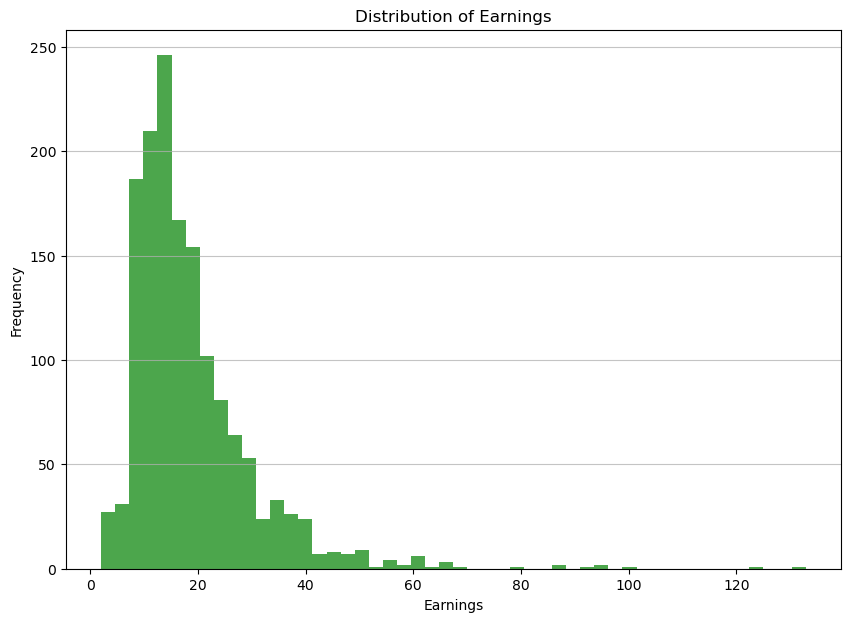

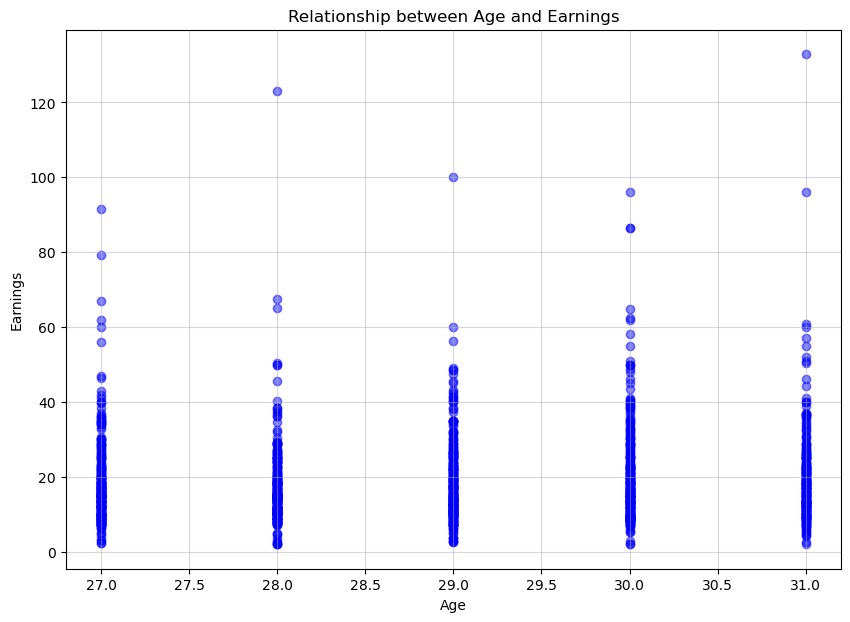

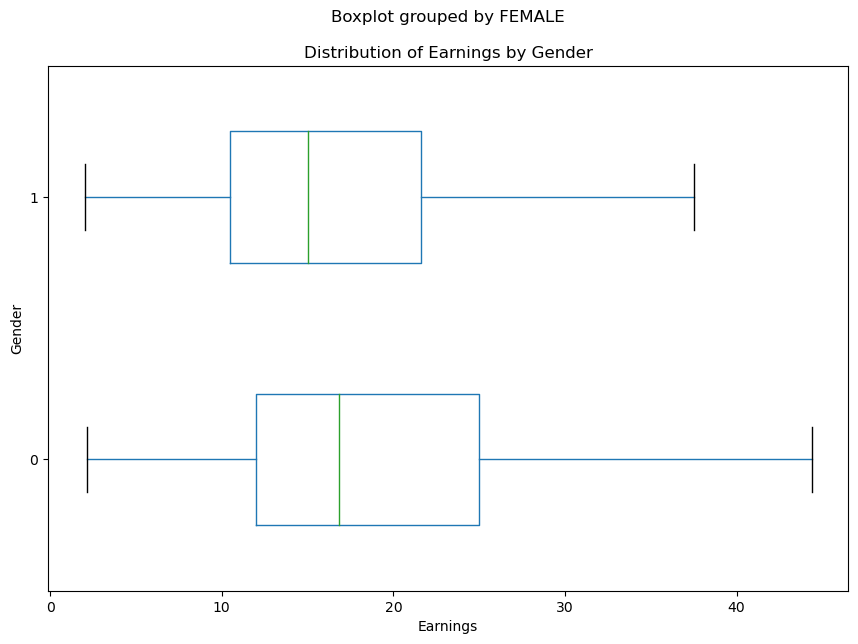

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,7)

# Distribution of earnings
plt.hist(df_data['EARNINGS'], bins=50, color='green', alpha=0.7)
plt.xlabel('Earnings')
plt.ylabel('Frequency')
plt.title('Distribution of Earnings')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Relationship between age and earnings
plt.scatter(df_data['AGE'], df_data['EARNINGS'], alpha=0.5, color='blue')
plt.xlabel('Age')
plt.ylabel('Earnings')
plt.title('Relationship between Age and Earnings')
plt.grid(alpha=0.5)
plt.show()

# Distribution of earnings by gender
df_data.boxplot(column='EARNINGS', by='FEMALE', grid=False, showfliers=False, vert=False, widths=0.5)
plt.xlabel('Earnings')
plt.ylabel('Gender')
plt.title('Distribution of Earnings by Gender')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [31]:
np.random.seed(42)

# Split data into X & y
X = df_data.drop('EARNINGS', axis=1)
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

# Fit model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.20149313915043965

### Create evaluation function

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [24]:
# Score
model.score(X_train, y_train)


0.3041383267648299

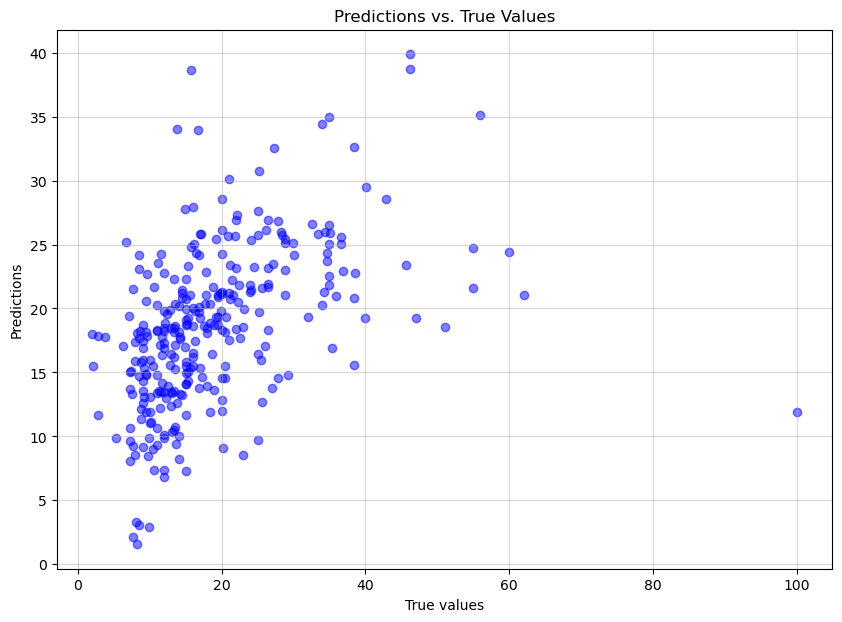

In [32]:
# Make predictions
y_preds = model.predict(X_test)

# Plot predictions against ground truth
plt.scatter(y_test, y_preds, alpha=0.5, color='blue')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.grid(alpha=0.5)
plt.show()


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

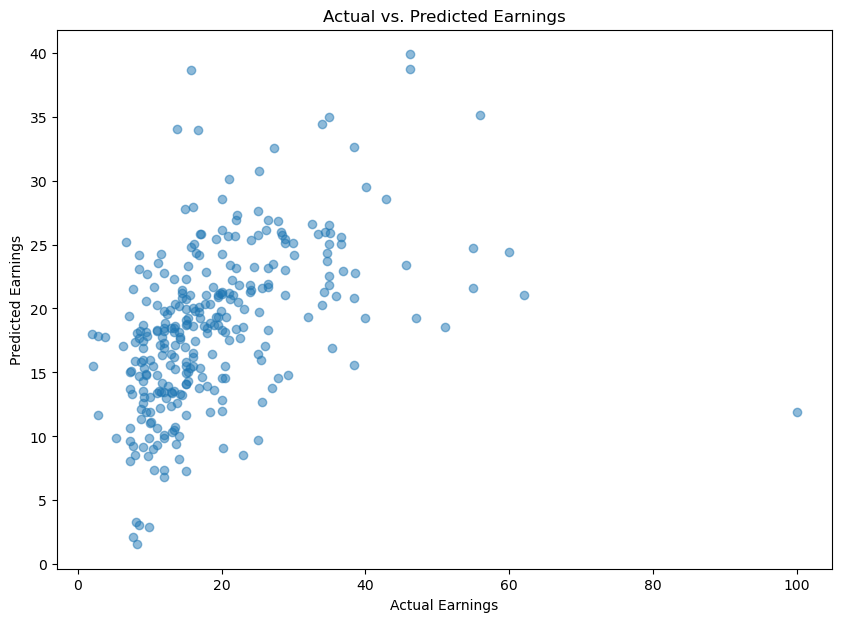

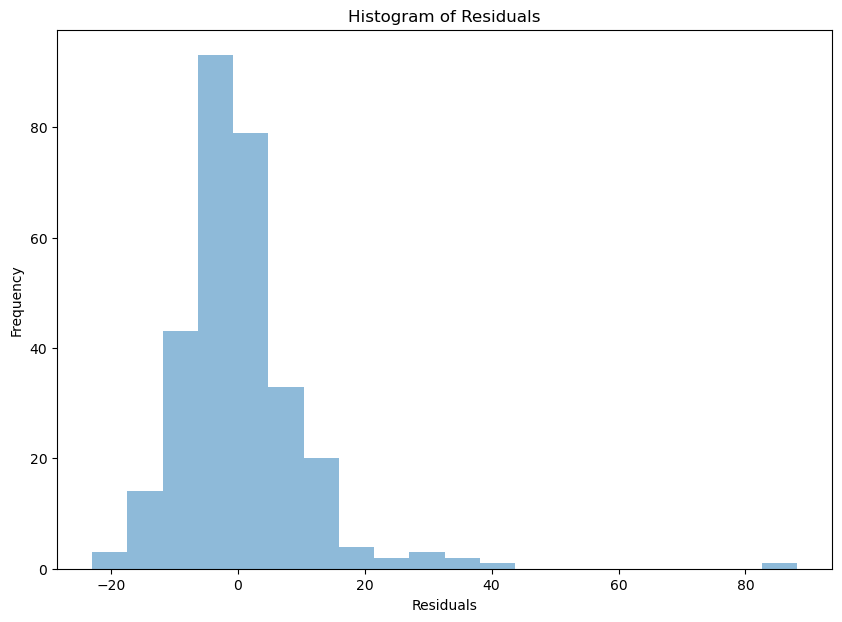

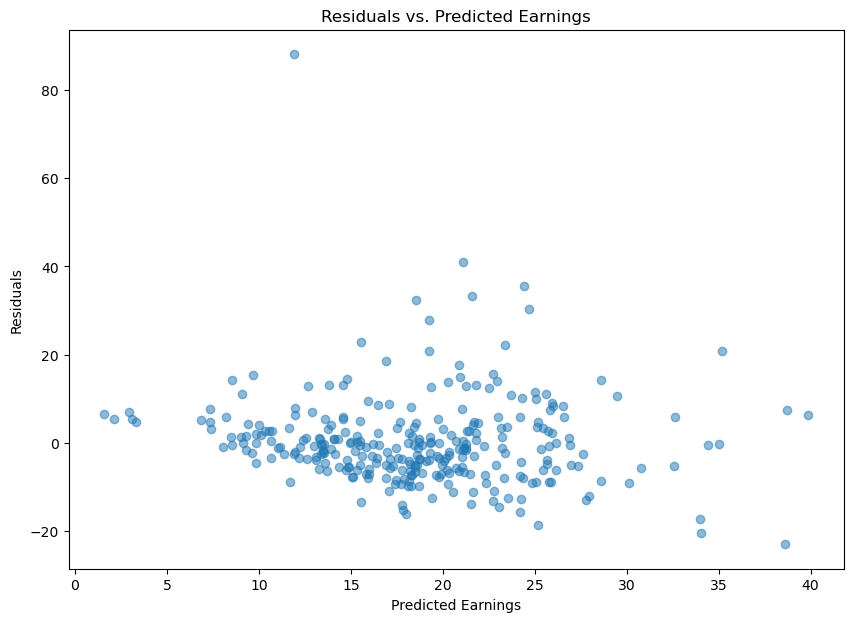

Mean Absolute Error: 6.64
Root Mean Squared Error: 10.22


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Earnings")
    plt.ylabel("Predicted Earnings")
    plt.title("Actual vs. Predicted Earnings")
    plt.show()
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 7))
    plt.hist(residuals, bins=20, alpha=0.5)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()
    plt.figure(figsize=(10, 7))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel("Predicted Earnings")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted Earnings")
    plt.show()
    print("Mean Absolute Error:", round(np.mean(np.abs(residuals)), 2))
    print("Root Mean Squared Error:", round(np.sqrt(np.mean(residuals ** 2)), 2))

visualize_predictions(model, X_test, y_test)


In [36]:
# Get feature importances
importances = model.coef_
indices = np.argsort(importances)[::-1]

# Print feature rankings
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

1. ASVABPC: 3058803.288474462
2. ASVABWK: 3058802.318771556
3. ASVABMK: 1099343.3984865993
4. ASVABAR: 814014.6645886609
5. ASVABC: 519182.07407575723
6. HHINC97_is_missing: 13.65082274812772
7. SMR_is_missing: 13.541158918427932
8. EDUCPROF: 12.050470927087563
9. CATSE: 8.235074936096202
10. MSA11NK: 4.805979206308988
11. COLLBARG: 4.411402616519423
12. HHBMONLY: 4.3432420530393365
13. HHBMBF: 1.8736287300303427
14. FAITHJ: 1.8069322585998555
15. PRMONF_is_missing: 1.6654477056349686
16. EDUCPHD: 1.5986250182691442
17. HHBMOF: 1.4924783221133922
18. HHOMBF: 1.2662304703220226
19. REGW: 1.2521665414179248
20. REGS: 1.1906515562629418
21. S: 1.0619890135952097
22. CATPRI: 1.0467918356727943
23. REG97NE: 0.9939313423433808
24. MARRIED: 0.8565416090563925
25. EXP: 0.8347896337292912
26. JOBS_is_missing: 0.7469083350132646
27. PRMSTYUN: 0.6437057945601128
28. SMR: 0.5927414974936838
29. RS97URBN: 0.5888396572366147
30. BYEAR: 0.5754438338782392
31. PRMSTYAE_is_missing: 0.4816283013946552
3

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

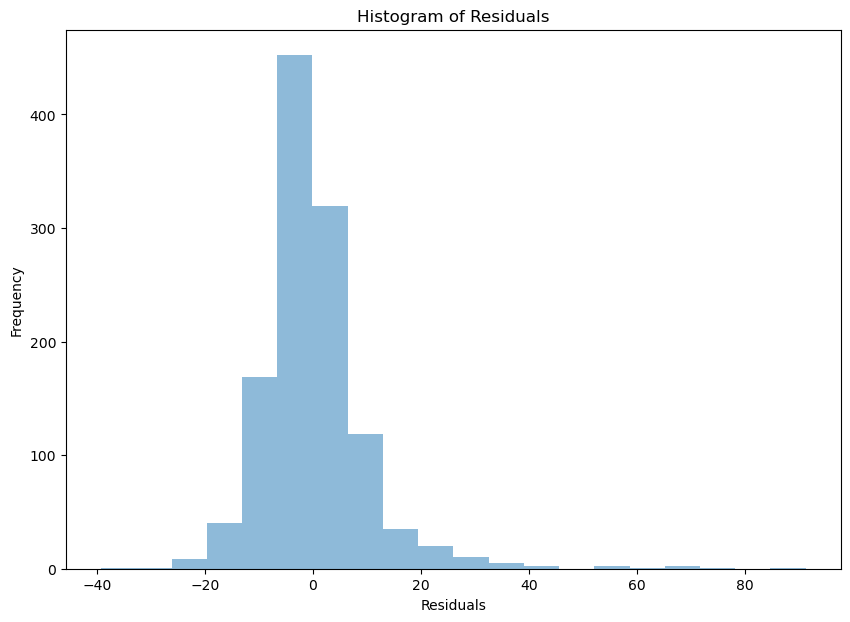

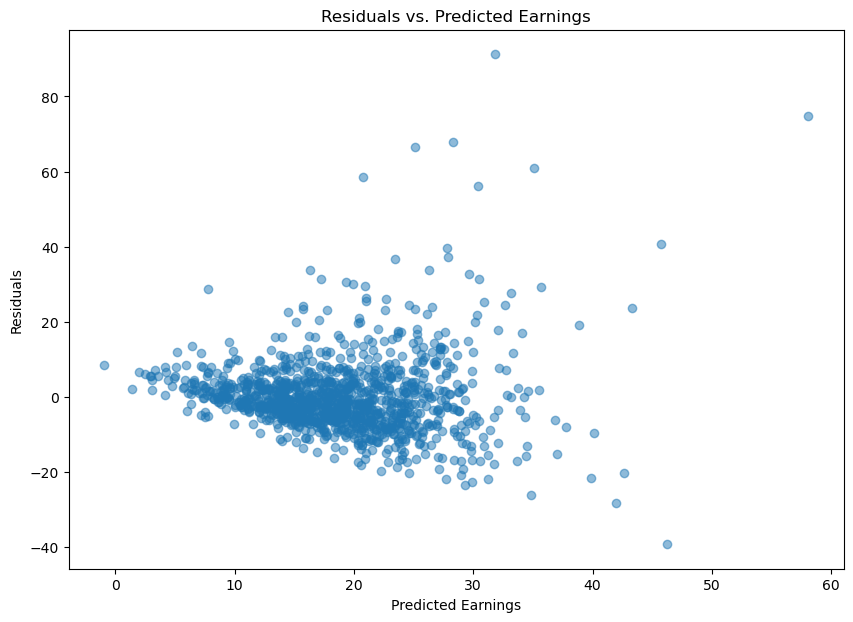

Mean Absolute Error: 6.64
Root Mean Squared Error: 10.12


In [37]:
# Plot the residuals
residuals = y_train - model.predict(X_train)
plt.hist(residuals, bins=20, alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Plot the residuals vs. the predictions
plt.scatter(model.predict(X_train), residuals, alpha=0.5)
plt.xlabel("Predicted Earnings")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Earnings")
plt.show()

# Print the mean absolute error and the root mean squared error
print("Mean Absolute Error:", round(np.mean(np.abs(residuals)), 2))
print("Root Mean Squared Error:", round(np.sqrt(np.mean(residuals ** 2)), 2))



# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [40]:
# Multivariable Regression
# Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

# Set random seed
np.random.seed(42)

# Split data into X & y
X = df_data[['S', 'EXP']]
y = df_data['EARNINGS']

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [42]:

# Evaluate the model on the test data
model.score(X_test, y_test)

0.07313839297805502

### Evaluate the Coefficients of the Model

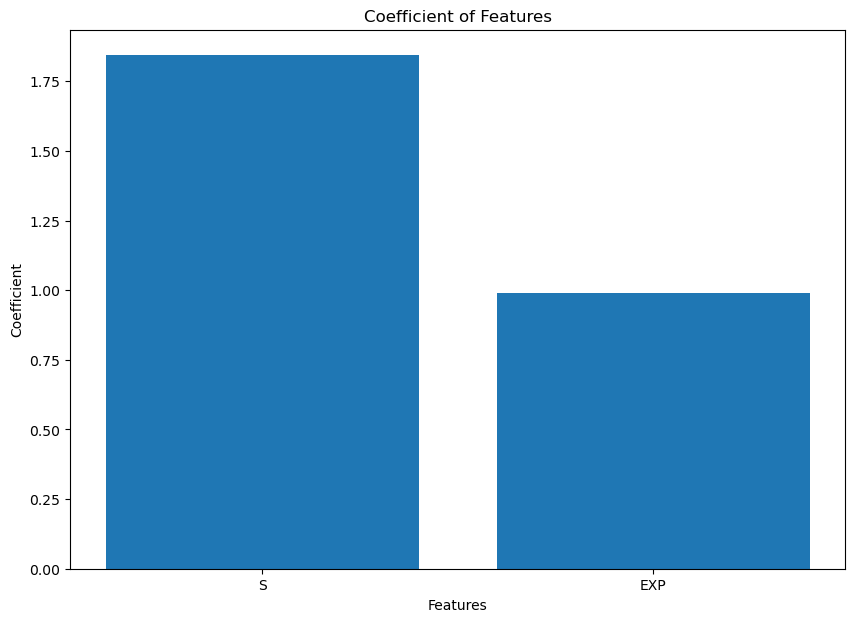

In [44]:


# Evaluate the coefficients of the model
model.coef_

# plot the coefficients
plt.bar(X.columns, model.coef_)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Coefficient of Features")
plt.show()


### Analyse the Estimated Values & Regression Residuals

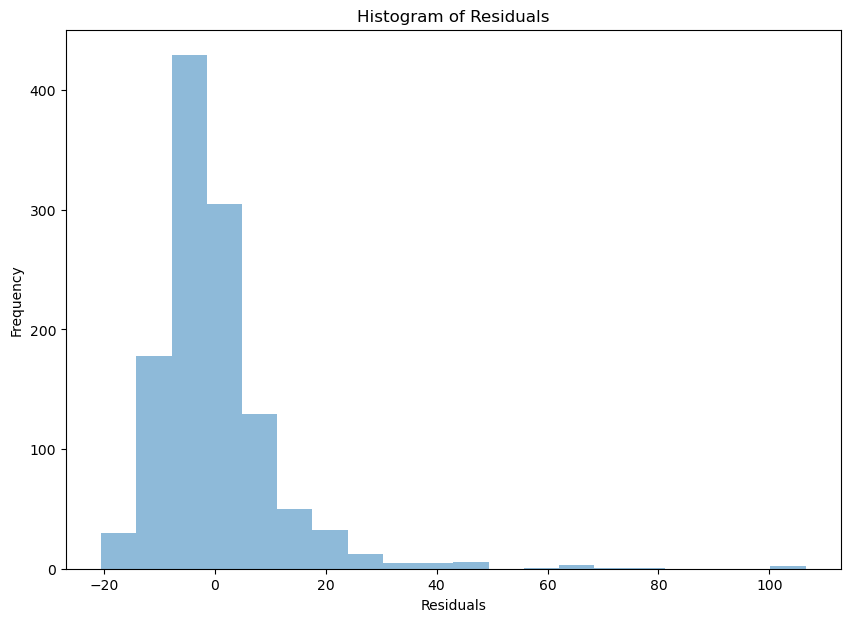

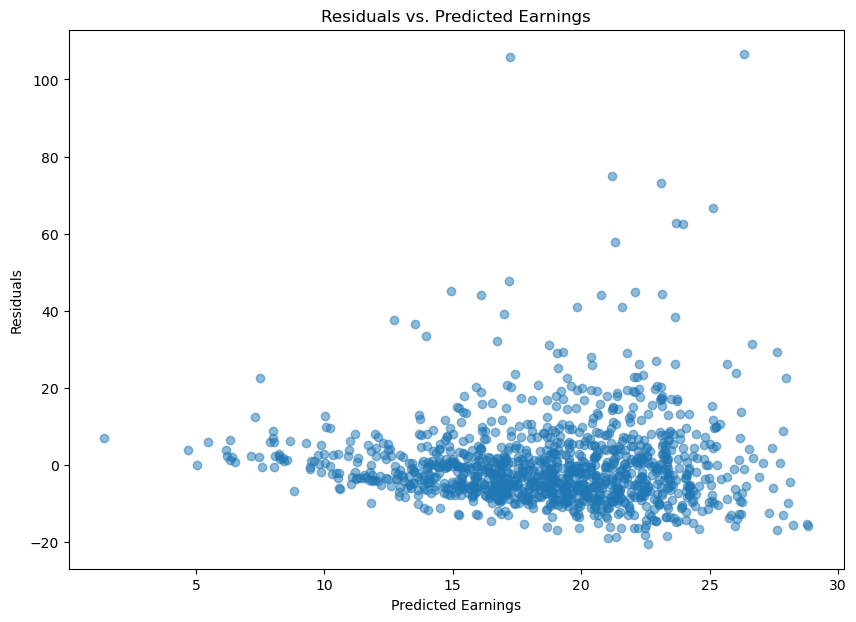

In [45]:
# Plot the residuals
residuals = y_train - model.predict(X_train)
plt.hist(residuals, bins=20, alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Plot the residuals vs. the predictions
plt.scatter(model.predict(X_train), residuals, alpha=0.5)
plt.xlabel("Predicted Earnings")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Earnings")
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [50]:
np.random.seed(42)

# Split data
X = df_data[['S', 'EXP']]
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Evaluate
model.score(X_test, y_test)

# Predict How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011
model.predict([[16, 5]])


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.79360452])

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 